## Business Case - ebike

#### ABC is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, ABC provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

#### ABC zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

## Problem statement

#### ABC has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as sts
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ebike.txt')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
df.shape

(10886, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
df['time'] = df['datetime'].apply(lambda x: x.split(' ')[1])

In [6]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [7]:
df['year']= df.datetime.dt.year
df['month']= df['datetime'].dt.month
df['date']= df['datetime'].dt.day
df['dayofweek'] = df['datetime'].dt.weekday

In [8]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,time,year,month,date,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,00:00:00,2011,1,1,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,01:00:00,2011,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,02:00:00,2011,1,1,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,03:00:00,2011,1,1,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,04:00:00,2011,1,1,5


In [9]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,date,dayofweek
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,9.992559,3.013963
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,5.476608,2.004585
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,5.000000,1.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,10.000000,3.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,15.000000,5.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,19.000000,6.000000


#### We don't require datetime column anymore. So dropping the column

In [10]:
df.drop(['datetime'],axis=1,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  time        10886 non-null  object 
 12  year        10886 non-null  int64  
 13  month       10886 non-null  int64  
 14  date        10886 non-null  int64  
 15  dayofweek   10886 non-null  int64  
dtypes: float64(3), int64(12), object(1)
memory usage: 1.3+ MB


In [12]:
df.nunique()

season          4
holiday         2
workingday      2
weather         4
temp           49
atemp          60
humidity       89
windspeed      28
casual        309
registered    731
count         822
time           24
year            2
month          12
date           19
dayofweek       7
dtype: int64

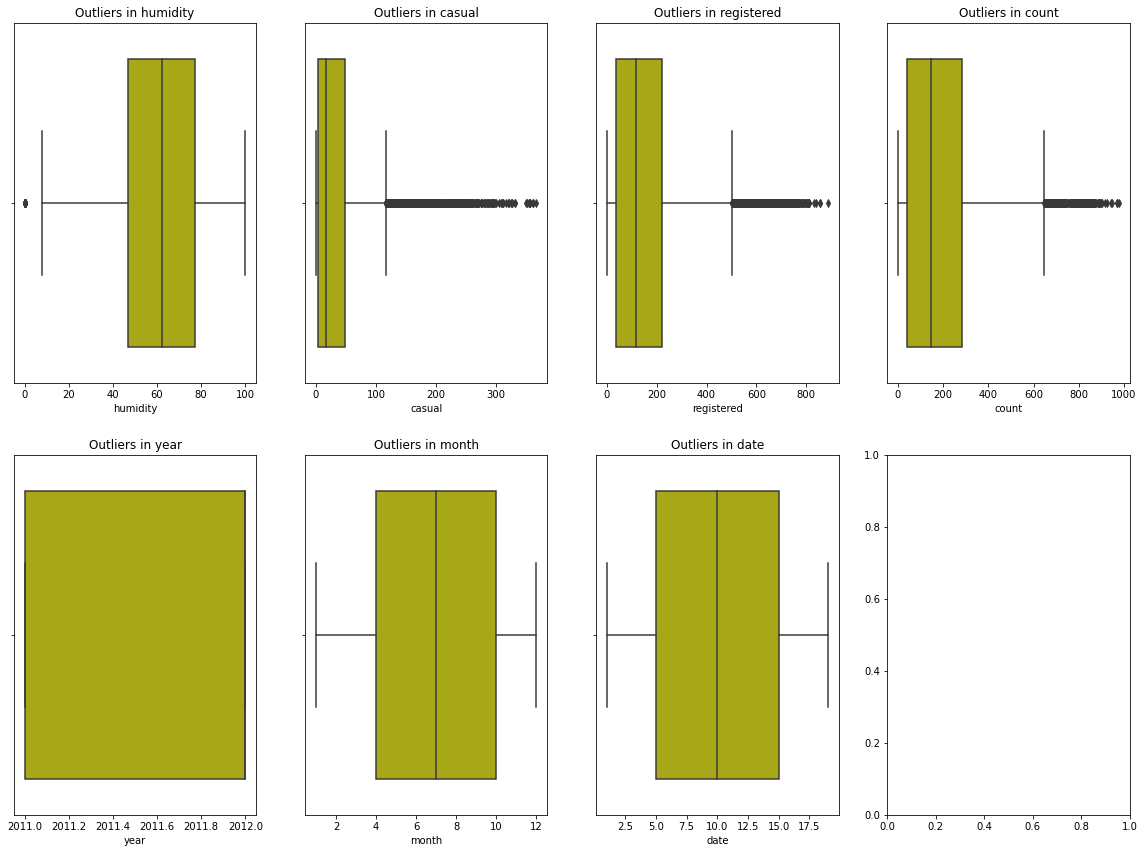

In [13]:
fig, axis = plt.subplots(nrows=2, ncols=4, figsize=(20, 8))
fig.subplots_adjust(top=1.5)

sns.boxplot(x='humidity',data = df,ax=axis[0,0],color='y').set_title('Outliers in humidity')
sns.boxplot(x='casual',data = df,ax=axis[0,1],color='y').set_title('Outliers in casual')
sns.boxplot(x='registered',data = df,ax=axis[0,2],color='y').set_title('Outliers in registered')
sns.boxplot(x='count',data = df,ax=axis[0,3],color='y').set_title('Outliers in count')
sns.boxplot(x='year',data = df,ax=axis[1,0],color='y').set_title('Outliers in year')
sns.boxplot(x='month',data = df,ax=axis[1,1],color='y').set_title('Outliers in month')
sns.boxplot(x='date',data = df,ax=axis[1,2],color='y').set_title('Outliers in date')
plt.show()

#### There are outliers in casual, registered and count columns.

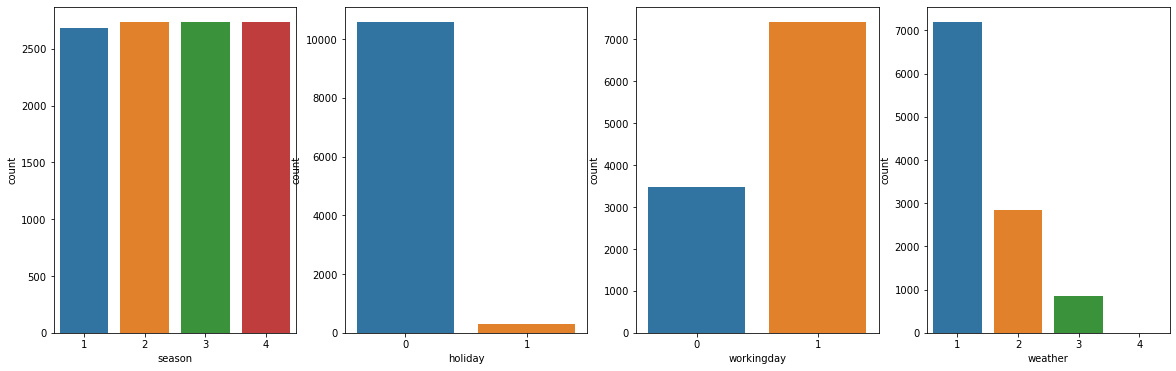

In [14]:
fig, axis = plt.subplots(nrows=1, ncols=4, figsize=(20, 6))

sns.countplot(x=df['season'],ax=axis[0])
sns.countplot(x=df['holiday'],ax=axis[1])
sns.countplot(x=df['workingday'],ax=axis[2])
sns.countplot(x=df['weather'],ax=axis[3])
plt.show()

#### Here, the data contains more of data points on working day as we can see both on plots.
#### We have the data for weather category 4 which is negligeble and i suppose we can drop those rows which contain weather category 4.

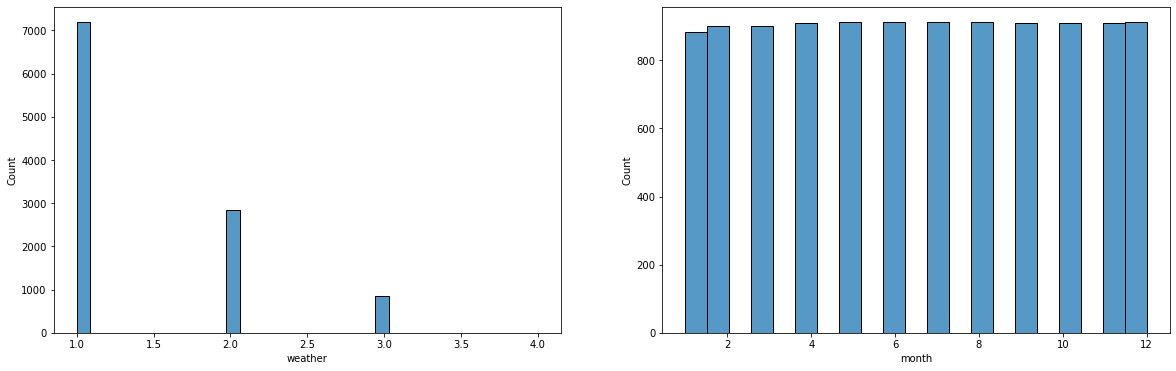

In [15]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

sns.histplot(x=df['weather'],ax=axis[0])
sns.histplot(x=df['month'],ax=axis[1])

plt.show()

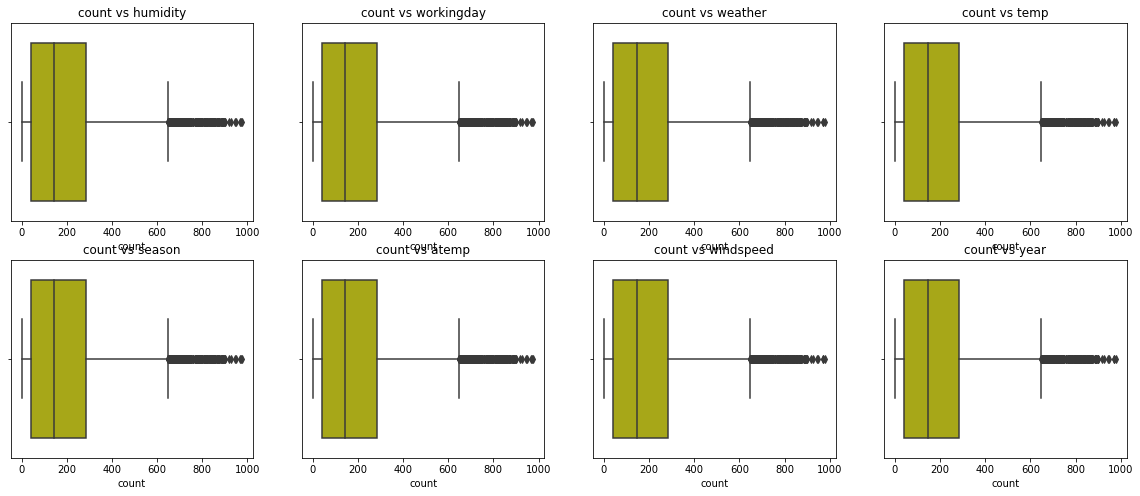

In [16]:
fig, axis = plt.subplots(nrows=2, ncols=4, figsize=(20, 8))

sns.boxplot(x='count',hue='humidity',data = df,ax=axis[0,0],color='y').set_title('count vs humidity')
sns.boxplot(x='count',hue='workingday',data = df,ax=axis[0,1],color='y').set_title('count vs workingday')
sns.boxplot(x='count',hue='weather',data = df,ax=axis[0,2],color='y').set_title('count vs weather')
sns.boxplot(x='count',hue='temp',data = df,ax=axis[0,3],color='y').set_title('count vs temp')
sns.boxplot(x='count',hue='season',data = df,ax=axis[1,0],color='y').set_title('count vs season')
sns.boxplot(x='count',hue='atemp',data = df,ax=axis[1,1],color='y').set_title('count vs atemp')
sns.boxplot(x='count',hue='windspeed',data = df,ax=axis[1,2],color='y').set_title('count vs windspeed')
sns.boxplot(x='count',hue='year',data = df,ax=axis[1,3],color='y').set_title('count vs year')
plt.show()

In [17]:
df.groupby('season')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


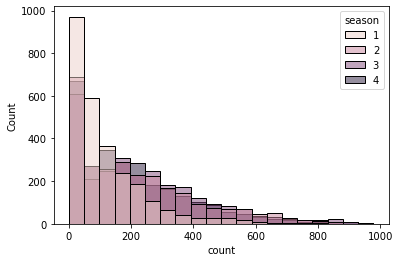

In [18]:
sns.histplot(data = df , x = "count" , hue = "season" , bins = 20)
plt.show()

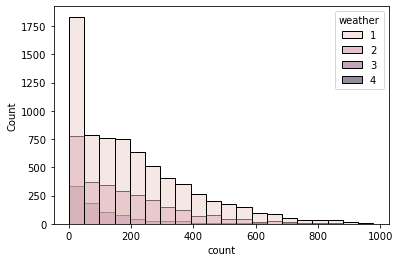

In [19]:
sns.histplot(data = df , x = "count" , hue = "weather" , bins = 20)
plt.show()

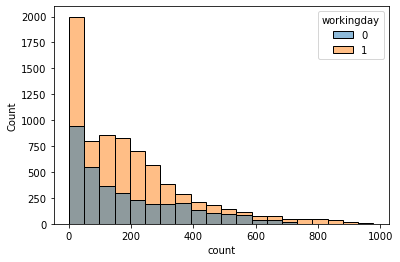

In [20]:
sns.histplot(data = df , x = "count" , hue = "workingday" , bins = 20)
plt.show()

### Hypothesis Testing

#### 1 . Working Day has effect on number of electric cycles rented - t test
#### 2 . State null and alternate hypothesis 
#### 3 . Set a significance level (alpha)
#### 4 . Calculate test Statistics.

In [21]:
### t-test
df.groupby('workingday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


In [22]:
df['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

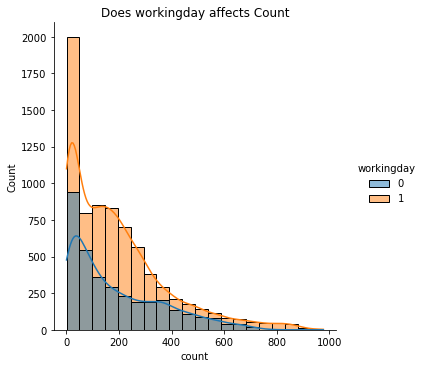

In [23]:
sns.displot(x='count', bins=20, kde=True,hue='workingday', data=df)
plt.title('Does workingday affects Count')
plt.show()

#### We can't say anything about workingday is effecting the count
### Null Hypothesis - Working day effects the count of the yulu rented.
### Alternate Hypothesis - It does not effect the count.

In [24]:
# test

workingday = df[df['workingday']==1]
nonworkingday = df[df['workingday']==0]
ws = workingday.sample(1000)
nws = nonworkingday.sample(1000)

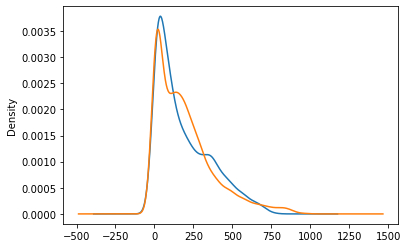

In [25]:
df.groupby("workingday")["count"].plot(kind = "kde")
plt.show()

In [26]:
sample_size=1000
workingday1_sample_means=[df[df['workingday']==1].sample(sample_size, replace=True)['count'].mean() for i in range(sample_size)]

In [27]:
workingday0_sample_means=[df[df['bworkingday']==0].sample(sample_size, replace=True)['count'].mean() for i in range(1000)]

KeyError: 'bworkingday'

In [ ]:
sns.distplot(workingday1_sample_means)
plt.title('workingday1 sample means')
plt.show()

In [ ]:
sns.distplot(workingday0_sample_means)
plt.title('workingday0 sample means')
plt.show()

In [ ]:
sm1 =np.mean(workingday1_sample_means)
sm1

In [ ]:
sm0=np.mean(workingday0_sample_means)
sm0

In [ ]:
std1 = sm1.std()
std1

In [ ]:
std2 = sm0.std()
std2

In [ ]:
se1 = std1 / np.sqrt(len(workingday)) ## standard error
se1

In [ ]:
se2 = std2 / np.sqrt(len(nonworkingday)) ## standard error
se2

In [ ]:
stats,p_value = sts.levene(workingday1_sample_means , workingday0_sample_means)
print("Test_Statistics: " , stats)
print("P_Value: " , p_value)
if p_value >= 0.05:
 print("FAIL TO REJECT NULL HYPOTHESIS")
else:
 print("REJECT THE NULL HYPOTHESIS")

#### Here we see that P-value is greater than 0.05(significance value), so there is effect of working day on the count of yulu bikes rented. 

### Anova test
### No of cycles rented similar or different in different seasons
#### Null Hypothesis - the Yulu bikes rented are same in different seasons
#### Alternate Hypothesis - Yulu bikes rented are different in different seasons

In [ ]:
df['weather'].value_counts()

#### Aswe saw above the weather category with 4 has only one row, so i'm dropping that row

In [ ]:
df.drop(df[df['weather']==4].index,axis=0,inplace=True)

In [ ]:
df['weather'].value_counts()

In [ ]:
df.groupby('weather')['count'].describe()

In [ ]:
df.groupby("weather")["count"].plot(kind = "hist")
plt.legend()
plt.show()

In [ ]:
weather1 = df.loc[df["weather"] == 1]["count"].values
weather2 = df.loc[df["weather"] == 2]["count"].values
weather3 = df.loc[df["weather"] == 3]["count"].values
Stats , p_value = sts.f_oneway(weather1 , weather2 , weather3)
print("Statistical_value: " , Stats)
print("P_value: " , p_value)
if p_value >= 0.05:
 print("FAIL TO REJECT NULL HYPOTHESIS")
else:
 print("REJECT THE NULL HYPOTHESIS")

#### so the effect of season is on the bike rentals. The rentals are different in different season.

### Anova test
### No of cycles rented similar or different in different weathers.
#### Null Hypothesis - the Yulu bikes rented are same in different weathers.
#### Alternate Hypothesis - Yulu bikes rented are different in different weathers.

In [ ]:
df.groupby("season")["count"].describe()

In [ ]:
df.groupby("season")["count"].plot(kind = "kde")
plt.legend()
plt.show()


In [ ]:
season1 = df.loc[df["season"] == 1]["count"].values
season2 = df.loc[df["season"] == 2]["count"].values
season3 = df.loc[df["season"] == 3]["count"].values
season4 = df.loc[df["season"] == 4]["count"].values
stats,p_value = sts.f_oneway(season1 ,season2 , season3 , season4)
print("Test_Statistics: " , stats)
print("P_value: " , p_value)
if p_value >= 0.05:
 print("FAIL TO REJECT NULL HYPOTHESIS")
else:
 print("REJECT THE NULL HYPOTHESIS")

#### so the effect of weather is on the bike rentals. The rentals are different in different weathers.

### Weather is dependent on season (check between 2 predictor variable)


### Chi-square test

#### Null Hypothesis - The weather is independent of season.
#### Alternate Hypothesis - The weather is dependent on season.

In [ ]:
alpha = 0.05
data = pd.crosstab(df["weather"] , df["season"])
stats , p_value , dof , expected = sts.chi2_contingency(data)
print("Statistical_value: " , stats)
print("P_value: " , p_value)
if p_value >= 0.05:
 print("FAIL TO REJECT NULL HYPOTHESIS")
else:
 print("REJECT THE NULL HYPOTHESIS")

#### The weather is dependent on seasons i.e. they are directly proportional

## Conclusions

#### 1. The demand of ABC is more when there is no holiday and if that is a working day. 
#### 2. The demand of ABC is more in fall season with a mean of 234.417124. The management can have some people work in those season and place more yulus on the road.
#### 3. Different weathers have different demand for ABC. As we have done the ANOVA test to prove this.
#### 4. Through Chi-square test we have proven that the weather is dependent on season. As the season changes there is high possibility that the demand of ABC changes and the management needs to adjust accordingly.